In [39]:
#Libariries for Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for ML
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

#To make the cells look cleaner
import warnings


In [34]:
df = pd.read_csv('Cleaned Training.csv', index_col = 'match_id')
df2 = pd.read_csv('Cleaned Testing.csv', index_col = 'match_id')

In [35]:
df.head()

,r1_hero,r1_items,r2_hero,r2_items,r3_hero,r3_items,r4_hero,r4_items,r5_hero,r5_items,...,dire_first_ward_time,radiant_win,Radiant_Total_xp,Dire_Total_xp,Radiant_Total_gold,Dire_Total_gold,Radiant_Total_lh,Dire_Total_lh,Radiant_Total_kills,Dire_Total_kills
match_id,,,,,,,,,,,,,,,,,,,,,
1,44,7,97,6,29,9,85,8,40,7,...,0.0,1,5497,6419,4615,4348,46,52,0,0
2,77,6,47,15,68,9,20,7,51,7,...,-9.0,0,5820,5115,6021,3989,61,30,2,0
3,66,7,22,8,76,6,23,6,87,7,...,18.0,1,8085,6007,6491,5096,75,59,2,1
4,5,10,53,4,1,7,21,9,11,4,...,0.0,0,7756,5937,6436,4907,73,48,2,1
5,102,6,98,9,75,5,21,2,74,6,...,0.0,0,5399,5931,5143,5471,44,42,1,2


In [36]:
df2.head()

,r1_hero,r1_items,r2_hero,r2_items,r3_hero,r3_items,r4_hero,r4_items,r5_hero,r5_items,...,dire_ward_sentry_count,dire_first_ward_time,Radiant_Total_xp,Dire_Total_xp,Radiant_Total_gold,Dire_Total_gold,Radiant_Total_lh,Dire_Total_lh,Radiant_Total_kills,Dire_Total_kills
match_id,,,,,,,,,,,,,,,,,,,,,
1,57,8,11,8,50,6,59,16,104,7,...,0,-6.0,6795,6602,5316,5430,65,55,0,1
2,51,6,42,5,76,9,23,6,8,7,...,0,0.0,5772,6383,4203,4820,38,45,0,0
3,112,2,71,0,8,7,11,3,26,9,...,0,8.0,6254,5553,5232,4622,53,37,0,1
4,57,9,62,7,44,3,107,6,76,11,...,0,-16.0,6518,5558,5226,4879,49,45,1,1
5,74,5,85,10,97,6,71,5,54,7,...,0,-21.0,6033,6585,4651,5963,39,52,1,3


# Initial Models

In [37]:
def model_maker(classifier):
    warnings.filterwarnings("ignore")
    
    X = df.drop('radiant_win', axis=1)
    y = df.radiant_win
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
   
    clf = classifier
    
    clf.fit(X, y)
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    
    print("Training Scores")
    print("Precision Score: {}".format(precision_score(y_train, train_preds)))
    print("Recall Score: {}".format(recall_score(y_train, train_preds)))
    print("Accuracy Score: {}".format(accuracy_score(y_train, train_preds)))
    print("F1 Score: {}".format(f1_score(y_train, train_preds)))
    
    cm_lr = confusion_matrix(y_train, train_preds)

    plt.figure(figsize = (9, 9))
    sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix for Train Data')
    
    print("\nTesting Scores")
    print("Precision Score: {}".format(precision_score(y_test, test_preds)))
    print("Recall Score: {}".format(recall_score(y_test, test_preds)))
    print("Accuracy Score: {}".format(accuracy_score(y_test, test_preds)))
    print("F1 Score: {}".format(f1_score(y_test, test_preds)))
    
    
    cm_lr = confusion_matrix(y_test, test_preds)

    plt.figure(figsize = (9, 9))
    sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix for Test Data')
    
    return clf

## Baseline KNN
This shows that the features in my model don't really work well with this model as it is only guessing a Radiant win every single time. Will need to continue feature engineering to improve the model

Training Scores
Precision Score: 0.5113502445347946
Recall Score: 1.0
Accuracy Score: 0.5113502445347946
F1 Score: 0.67668000370383

Testing Scores
Precision Score: 0.5129264627894644
Recall Score: 1.0
Accuracy Score: 0.5129264627894644
F1 Score: 0.6780586834917993


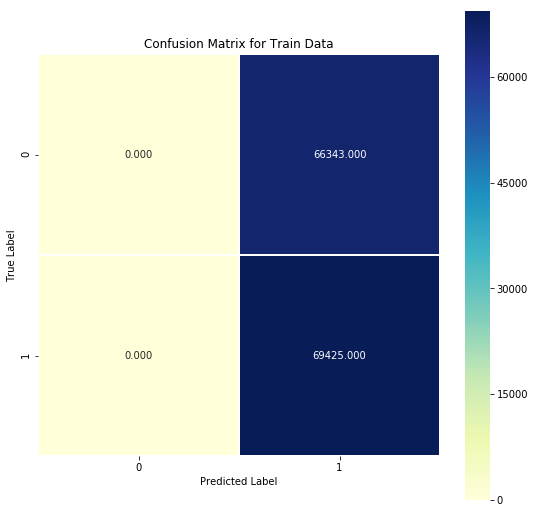

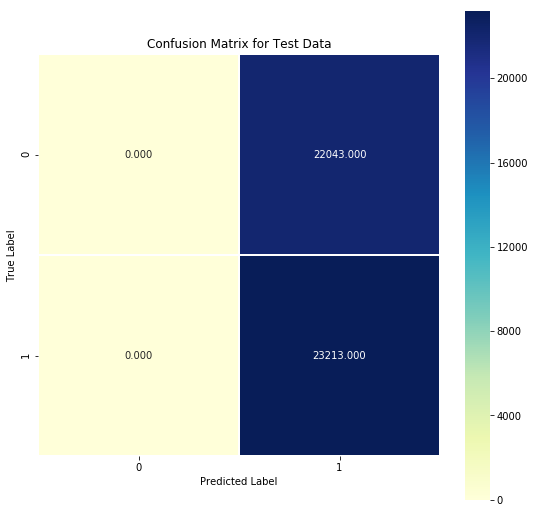

In [38]:
knn = model_maker(KNeighborsClassifier(n_jobs = 4))

## Baseline Logistic Regression

This shows that the features in my model don't really work well with this model as it has a really hard time distinguishing between a team winning or losing based on the data available from the first 5 minutes. It basically guesses at random whether each game will be a win or a loss. Will need to continue feature engineering to improve the model

Training Scores
Precision Score: 0.5511122182819964
Recall Score: 0.5417524956425289
Accuracy Score: 0.5400609863885452
F1 Score: 0.5463922767918759

Testing Scores
Precision Score: 0.550640227636493
Recall Score: 0.5334453202394797
Accuracy Score: 0.5373210182075305
F1 Score: 0.5419064079284168


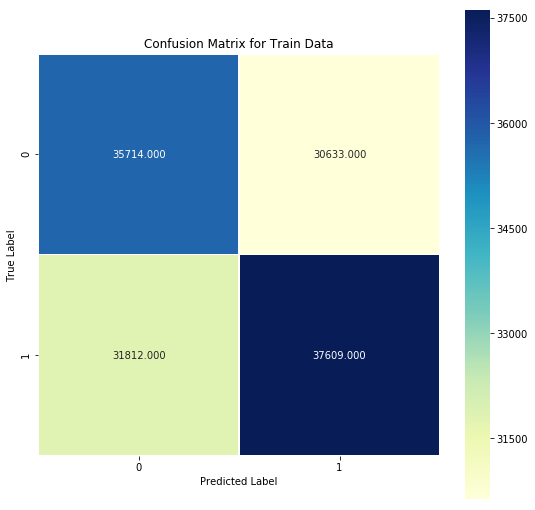

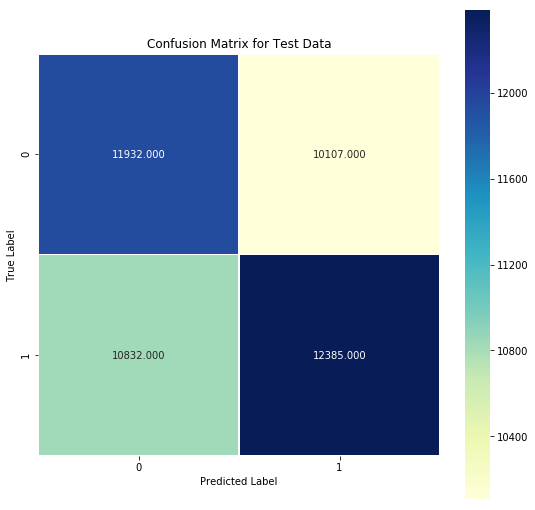

In [28]:
logreg = model_maker(LogisticRegression(n_jobs = 4))

## Baseline Decision Trees

Similar issue as with KNN but this model predicts a Radiant loss almost every single time

Training Scores
Precision Score: 0.25
Recall Score: 5.750183287092276e-05
Accuracy Score: 0.48757439160921573
F1 Score: 0.00011497722013826011

Testing Scores
Precision Score: 0.5333333333333333
Recall Score: 0.0003466955579631636
Accuracy Score: 0.4901449531553827
F1 Score: 0.0006929406669553919


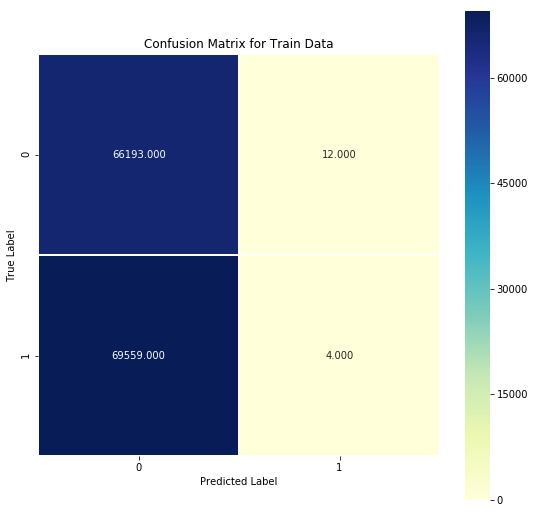

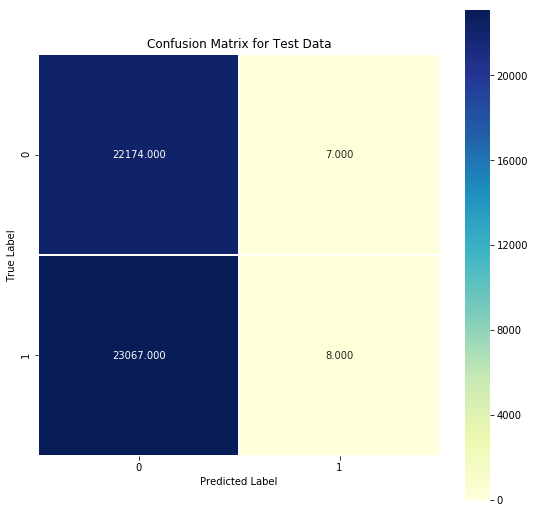

In [29]:
dt = model_maker(DecisionTreeClassifier())

## Initial Random Forest 
This model leans heavily towards predicting a loss but so far has performed the second best out of the 4 baseline models

Training Scores
Precision Score: 0.4793772871053774
Recall Score: 0.22241086587436332
Accuracy Score: 0.478286488716045
F1 Score: 0.3038487242992491

Testing Scores
Precision Score: 0.47598335854765506
Recall Score: 0.21758298755186722
Accuracy Score: 0.4775499381297508
F1 Score: 0.2986473659231134


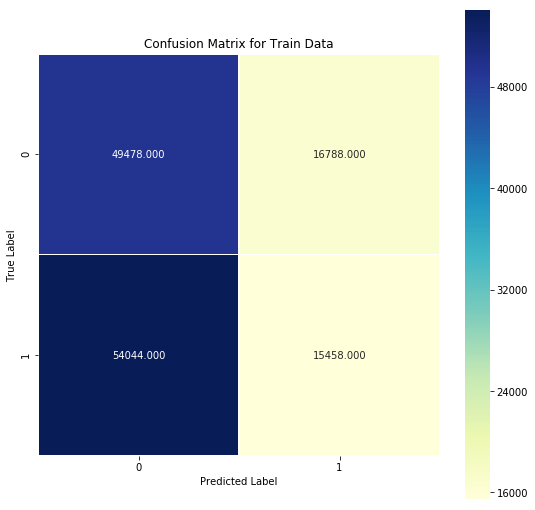

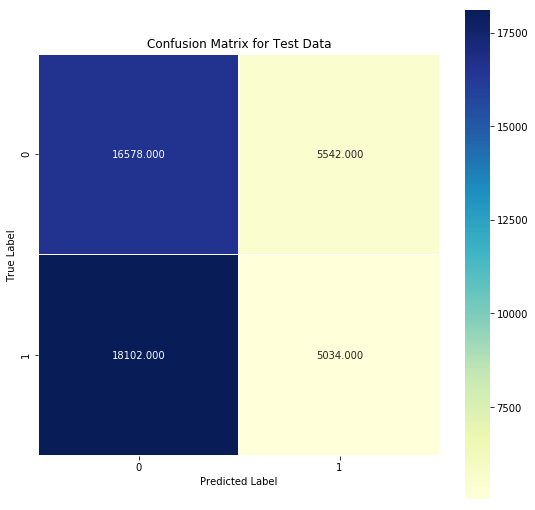

In [40]:
rf = model_maker(RandomForestClassifier(n_jobs = 4))